<a href="https://colab.research.google.com/github/ShivanshGupta55/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
train_df = pd.read_csv('/content/Train_dataset.csv')
test_df = pd.read_csv('/content/Test_dataset.csv')

In [2]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_df.shape))
print("The test data size before dropping Id feature is : {} ".format(test_df.shape))

#Save the 'Id' column
train_ID = train_df['people_ID']
test_ID = test_df['people_ID']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_df.drop("people_ID", axis = 1, inplace = True)
test_df.drop("people_ID", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape))


The train data size before dropping Id feature is : (10714, 28) 
The test data size before dropping Id feature is : (14498, 27) 

The train data size after dropping Id feature is : (10714, 27) 
The test data size after dropping Id feature is : (14498, 26) 


In [3]:
train_df.drop(['Name','Designation'], axis=1, inplace=True)
test_df.drop(['Name','Designation'], axis=1, inplace=True)
train_df.isnull().sum()

Region                       0
Gender                       0
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [0]:
train_df['Pulmonary_score'] = train_df['Pulmonary score'].str.replace('([<]+)', '')
test_df['Pulmonary_score'] = test_df['Pulmonary score'].str.replace('([<]+)', '')


In [0]:
train_df.drop('Pulmonary score', axis=1, inplace= True)
test_df.drop('Pulmonary score', axis=1, inplace= True)

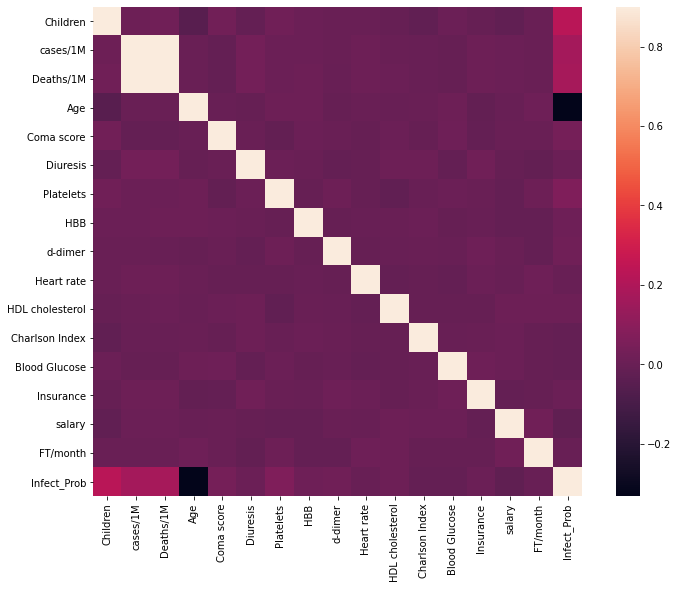

In [6]:
#Correlation map to see how features are correlated
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [7]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.Infect_Prob.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['Infect_Prob'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (25212, 24)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [8]:
all_data.head()

,Age,Blood Glucose,Charlson Index,Children,Coma score,Deaths/1M,Diuresis,FT/month,Gender,HBB,HDL cholesterol,Heart rate,Insurance,Married,Mode_transport,Occupation,Platelets,Pulmonary_score,Region,cardiological pressure,cases/1M,comorbidity,d-dimer,salary
0,68,7,27,1.0,8,0,441.0,2.0,Female,93.0,58.0,82.0,3600000.0,YES,Public,Farmer,154.0,400,Bhubaneshwar,Normal,2,Hypertension,233.0,1300000
1,64,6,5,2.0,15,0,NaN,1.0,Female,56.0,68.0,89.0,1600000.0,YES,Walk,Farmer,121.0,100,Bhubaneshwar,Stage-02,2,Diabetes,328.0,400000
2,19,6,40,1.0,13,0,416.0,1.0,Female,137.0,43.0,77.0,3400000.0,NO,Public,Cleaner,124.0,300,Bhubaneshwar,Elevated,2,None,213.0,900000
3,33,7,27,1.0,9,0,410.0,1.0,Female,167.0,60.0,64.0,700000.0,YES,Car,Driver,98.0,200,Bhubaneshwar,Stage-01,2,Coronary Heart Disease,275.0,2300000
4,23,7,32,2.0,7,0,390.0,1.0,Female,153.0,64.0,71.0,3200000.0,NO,Car,Manufacturing,21.0,400,Bhubaneshwar,Normal,2,Diabetes,331.0,1100000


In [0]:
all_data["Children"] = all_data.groupby("Married")["Children"].transform(lambda x: x.fillna(x.median()))

In [0]:
all_data["Occupation"] = all_data["Occupation"].fillna('None')

In [0]:
all_data["FT/month"] = all_data.groupby(["salary","Occupation"])["FT/month"].transform(lambda x: x.fillna(x.median()))

In [0]:
all_data["comorbidity"] = all_data["comorbidity"].fillna('None')

In [0]:
all_data["Insurance"] = all_data.groupby("salary")["Insurance"].transform(lambda x: x.fillna(x.mean()))

In [0]:
all_data["Heart rate"] = all_data.groupby(["Age","comorbidity"])["Heart rate"].transform(lambda x: x.fillna(x.mean()))

In [0]:
df_categorical = all_data[['Gender', 'Occupation','comorbidity','cardiological pressure', 'Mode_transport']]

In [16]:
df_categorical.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


,Gender,Occupation,comorbidity,cardiological pressure,Mode_transport
Gender,1.000000,0.001120,-0.000153,-0.006163,0.004597
Occupation,0.001120,1.000000,0.007328,-0.000355,-0.003536
comorbidity,-0.000153,0.007328,1.000000,-0.002460,0.011137
cardiological pressure,-0.006163,-0.000355,-0.002460,1.000000,0.004720
Mode_transport,0.004597,-0.003536,0.011137,0.004720,1.000000


In [0]:
all_data["cardiological pressure"].fillna(all_data["cardiological pressure"].mode()[0], inplace=True)
all_data["Mode_transport"].fillna(all_data["Mode_transport"].mode()[0], inplace=True)


In [0]:
all_data["Diuresis"] = all_data.groupby(["Gender","comorbidity"])["Diuresis"].transform(lambda x: x.fillna(x.mean()))

In [0]:
all_data["Platelets"] = all_data.groupby(["Age","comorbidity"])["Platelets"].transform(lambda x: x.fillna(x.mean()))

In [0]:
all_data["HBB"] = all_data.groupby(["Age","Gender"])["HBB"].transform(lambda x: x.fillna(x.mean()))

In [0]:
all_data["d-dimer"] = all_data.groupby(["Gender","comorbidity"])["d-dimer"].transform(lambda x: x.fillna(x.mean()))

In [0]:
all_data["HDL cholesterol"] = all_data.groupby(["Gender","comorbidity"])["HDL cholesterol"].transform(lambda x: x.fillna(x.mean()))

In [0]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [24]:

train = pd.get_dummies(train)
print(train.shape)

(10714, 50)


In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb

In [0]:
X = np.array(train)

X = StandardScaler().fit(X).transform(X)

In [27]:
train.head()

,Age,Blood Glucose,Charlson Index,Children,Coma score,Deaths/1M,Diuresis,FT/month,HBB,HDL cholesterol,Heart rate,Insurance,Platelets,cases/1M,d-dimer,salary,Gender_Female,Gender_Male,Married_NO,Married_YES,Mode_transport_Car,Mode_transport_Public,Mode_transport_Walk,Occupation_Business,Occupation_Cleaner,Occupation_Clerk,Occupation_Driver,Occupation_Farmer,Occupation_Legal,Occupation_Manufacturing,Occupation_None,Occupation_Researcher,Occupation_Sales,Pulmonary_score_100,Pulmonary_score_200,Pulmonary_score_300,Pulmonary_score_400,Region_Bengaluru,Region_Bhubaneshwar,Region_Chandigarh,Region_Chennai,Region_Delhi,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None
0,68,7,27,1.0,8,0,441.000000,2.0,93.0,58.0,82.0,3600000.0,154.0,2,233.0,1300000,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,64,6,5,2.0,15,0,281.173801,1.0,56.0,68.0,89.0,1600000.0,121.0,2,328.0,400000,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,19,6,40,1.0,13,0,416.000000,1.0,137.0,43.0,77.0,3400000.0,124.0,2,213.0,900000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,33,7,27,1.0,9,0,410.000000,1.0,167.0,60.0,64.0,700000.0,98.0,2,275.0,2300000,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
4,23,7,32,2.0,7,0,390.000000,1.0,153.0,64.0,71.0,3200000.0,21.0,2,331.0,1100000,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [0]:
x_train, x_test, Y_train, Y_test = train_test_split(X,y_train, test_size=0.1, random_state =42)


In [29]:
LR = RandomForestRegressor()
LR.fit(x_train, Y_train)
yhat_LR = LR.predict(x_test)
score_LR = mean_squared_error(Y_test,yhat_LR)
r2_LR = r2_score(Y_test,yhat_LR)
print(score_LR)
print(r2_LR)

92.44274319645444
0.2727901450236856


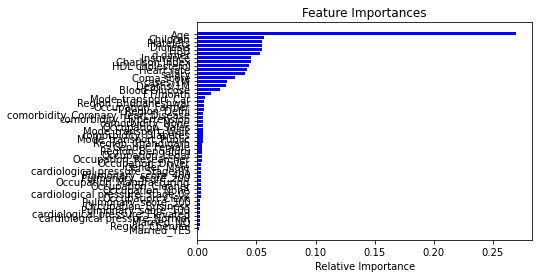

In [30]:
features = train.columns
importances = LR.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
lasso = Lasso()
lasso.fit(x_train, Y_train)
yhat_lasso = lasso.predict(x_test)
score_lasso = mean_squared_error(Y_test,yhat_LR)
print(score_lasso)


92.44274319645444


In [32]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(x_train, Y_train)
yhat_xgb = model_xgb.predict(x_test)
score_xgb = mean_squared_error(Y_test, yhat_xgb)
print(score_xgb)


[10:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
91.27118249843593


In [33]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1

Using TensorFlow backend.


In [34]:
model = Sequential()
model.add(Dense(256, activation="relu", input_dim = x_train.shape[1]))
model.add(Dense(1, input_dim = x_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               13056     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
hist = model.fit(x_train, Y_train, validation_data = (x_test, Y_test),epochs=15)





Train on 9642 samples, validate on 1072 samples
Epoch 1/15





9642/9642 [==============================] - 9s 921us/step - loss: 1194.3477 - val_loss: 107.7421
Epoch 2/15
9642/9642 [==============================] - 1s 88us/step - loss: 83.2744 - val_loss: 96.8469
Epoch 3/15
9642/9642 [==============================] - 1s 90us/step - loss: 79.0359 - val_loss: 96.1522
Epoch 4/15
9642/9642 [==============================] - 1s 86us/step - loss: 77.1694 - val_loss: 95.6713
Epoch 5/15
9642/9642 [==============================] - 1s 72us/step - loss: 75.8089 - val_loss: 94.3192
Epoch 6/15
9642/9642 [==============================] - 1s 86us/step - loss: 74.4371 - val_loss: 95.7064
Epoch 7/15
9642/9642 [==============================] - 1s 89us/step - loss: 73.8162 - val_loss: 95.9394
Epoch 8/15
9642/9642 [==============================] - 1s 82us/step - loss: 72.4701 - val_loss: 95.4648
Epoch 9/15
9642/9642 [==============================] - 1s 85us/step - loss: 72.3889 - val_loss: 95.

In [36]:
yhat_dl = model.predict(x_test)
print(mean_squared_error(Y_test, yhat_dl))


96.50820921249128


**Best accuracy is achieved by XGBoostRegressor
So, we'll use it for final predictions**

In [37]:
test = pd.get_dummies(test)
print(test.shape)

(14498, 50)


In [0]:
X_test = np.array(test)
X = StandardScaler().fit(X_test).transform(X_test)

In [0]:
submission = pd.DataFrame()
submission['people_ID'] = test_ID
submission['Infect_Prob'] = model_xgb.predict(X)

In [0]:
submission.to_csv('submission.csv',index=False)
